# Travel Insurance Prediction

Final Project Rakamin Data Science Batch 39 by Byte Blazers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from imblearn import over_sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 5
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
# Apply the default theme
sns.set_theme()

## Load Data

In [4]:
from google.colab import files
uploaded = files.upload()

Saving TravelInsurancePrediction.csv to TravelInsurancePrediction (2).csv


In [4]:
df = pd.read_csv('TravelInsurancePrediction.csv')
df.sample(5)

Unnamed: 0  Age               Employment Type GraduateOrNot  \
1013        1013   25  Private Sector/Self Employed            No   
1456        1456   25  Private Sector/Self Employed            No   
895          895   28  Private Sector/Self Employed           Yes   
1298        1298   27             Government Sector           Yes   
1027        1027   25  Private Sector/Self Employed            No   

      AnnualIncome  FamilyMembers  ChronicDiseases FrequentFlyer  \
1013        600000              4                0           Yes   
1456       1700000              3                0           Yes   
895         600000              5                0            No   
1298        500000              2                1            No   
1027       1150000              5                0           Yes   

     EverTravelledAbroad  TravelInsurance  
1013                  No                0  
1456                  No                1  
895                  Yes                1  
1298                  No                1  
1027                  No                0

## EDA, Insights & Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


Terdapat 1987 baris dan 10 kolom. Tipe data sudah sesuai dan tidak ada missing values.

In [6]:
# Pengelompokan kolom numeric dan kategori

cat = ['Employment Type','GraduateOrNot','FrequentFlyer','EverTravelledAbroad']
num = ['Age', 'AnnualIncome','FamilyMembers','ChronicDiseases','TravelInsurance']

### Descriptive Statistics

In [7]:
df[num].describe()

Age  AnnualIncome  FamilyMembers  ChronicDiseases  \
count  1987.000000  1.987000e+03    1987.000000      1987.000000   
mean     29.650226  9.327630e+05       4.752894         0.277806   
std       2.913308  3.768557e+05       1.609650         0.448030   
min      25.000000  3.000000e+05       2.000000         0.000000   
25%      28.000000  6.000000e+05       4.000000         0.000000   
50%      29.000000  9.000000e+05       5.000000         0.000000   
75%      32.000000  1.250000e+06       6.000000         1.000000   
max      35.000000  1.800000e+06       9.000000         1.000000   

       TravelInsurance  
count      1987.000000  
mean          0.357323  
std           0.479332  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max           1.000000

**Pengamatan Numerical:**

Ada perbedaan antara nilai rata-rata dengan median dari kelima kolom, yaitu `Age`, `AnnualIncome`, `FamilyMembers`, `ChronicDiseases`, dan `TravelInsurance` namun tidak begitu signifikan.

In [8]:
df[cat].describe()

Employment Type GraduateOrNot FrequentFlyer  \
count                           1987          1987          1987   
unique                             2             2             2   
top     Private Sector/Self Employed           Yes            No   
freq                            1417          1692          1570   

       EverTravelledAbroad  
count                 1987  
unique                   2  
top                     No  
freq                  1607

### Univariate Analysis

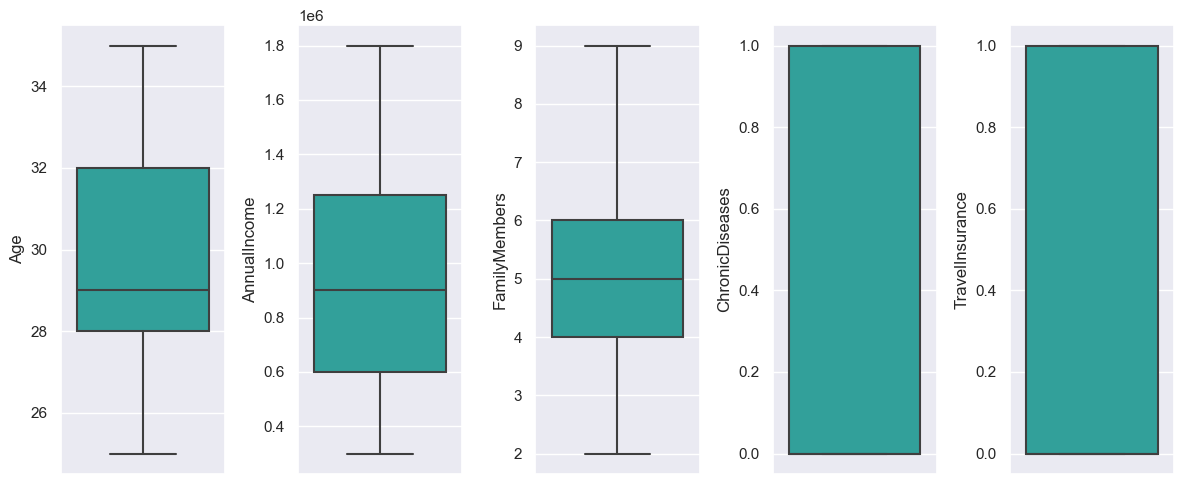

In [9]:
# Pengamatan dengan Boxplot

features = num
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='lightseagreen', orient='v')
    plt.tight_layout()

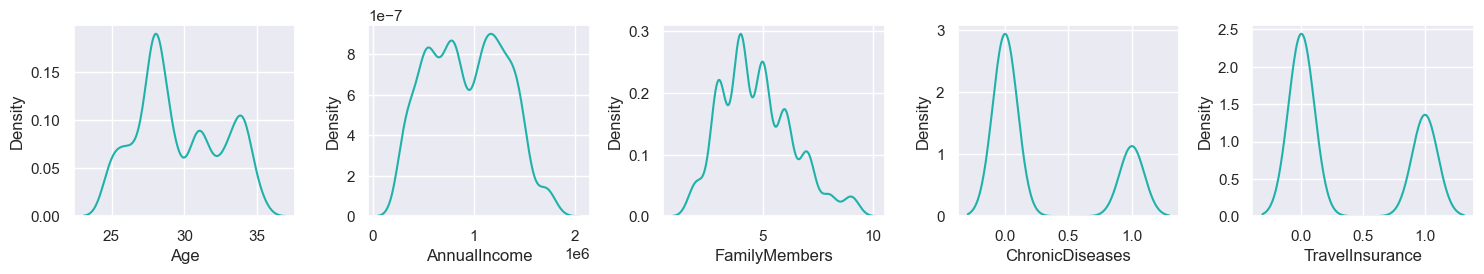

In [10]:
# Pengamatan dengan Displot

plt.figure(figsize=(15,5))
for i in range(0, len(num)):
    plt.subplot(2, len(num), i+1)
    sns.kdeplot(x=df[num[i]], color='lightseagreen')
    plt.xlabel(num[i])
    plt.tight_layout()

plt.show()

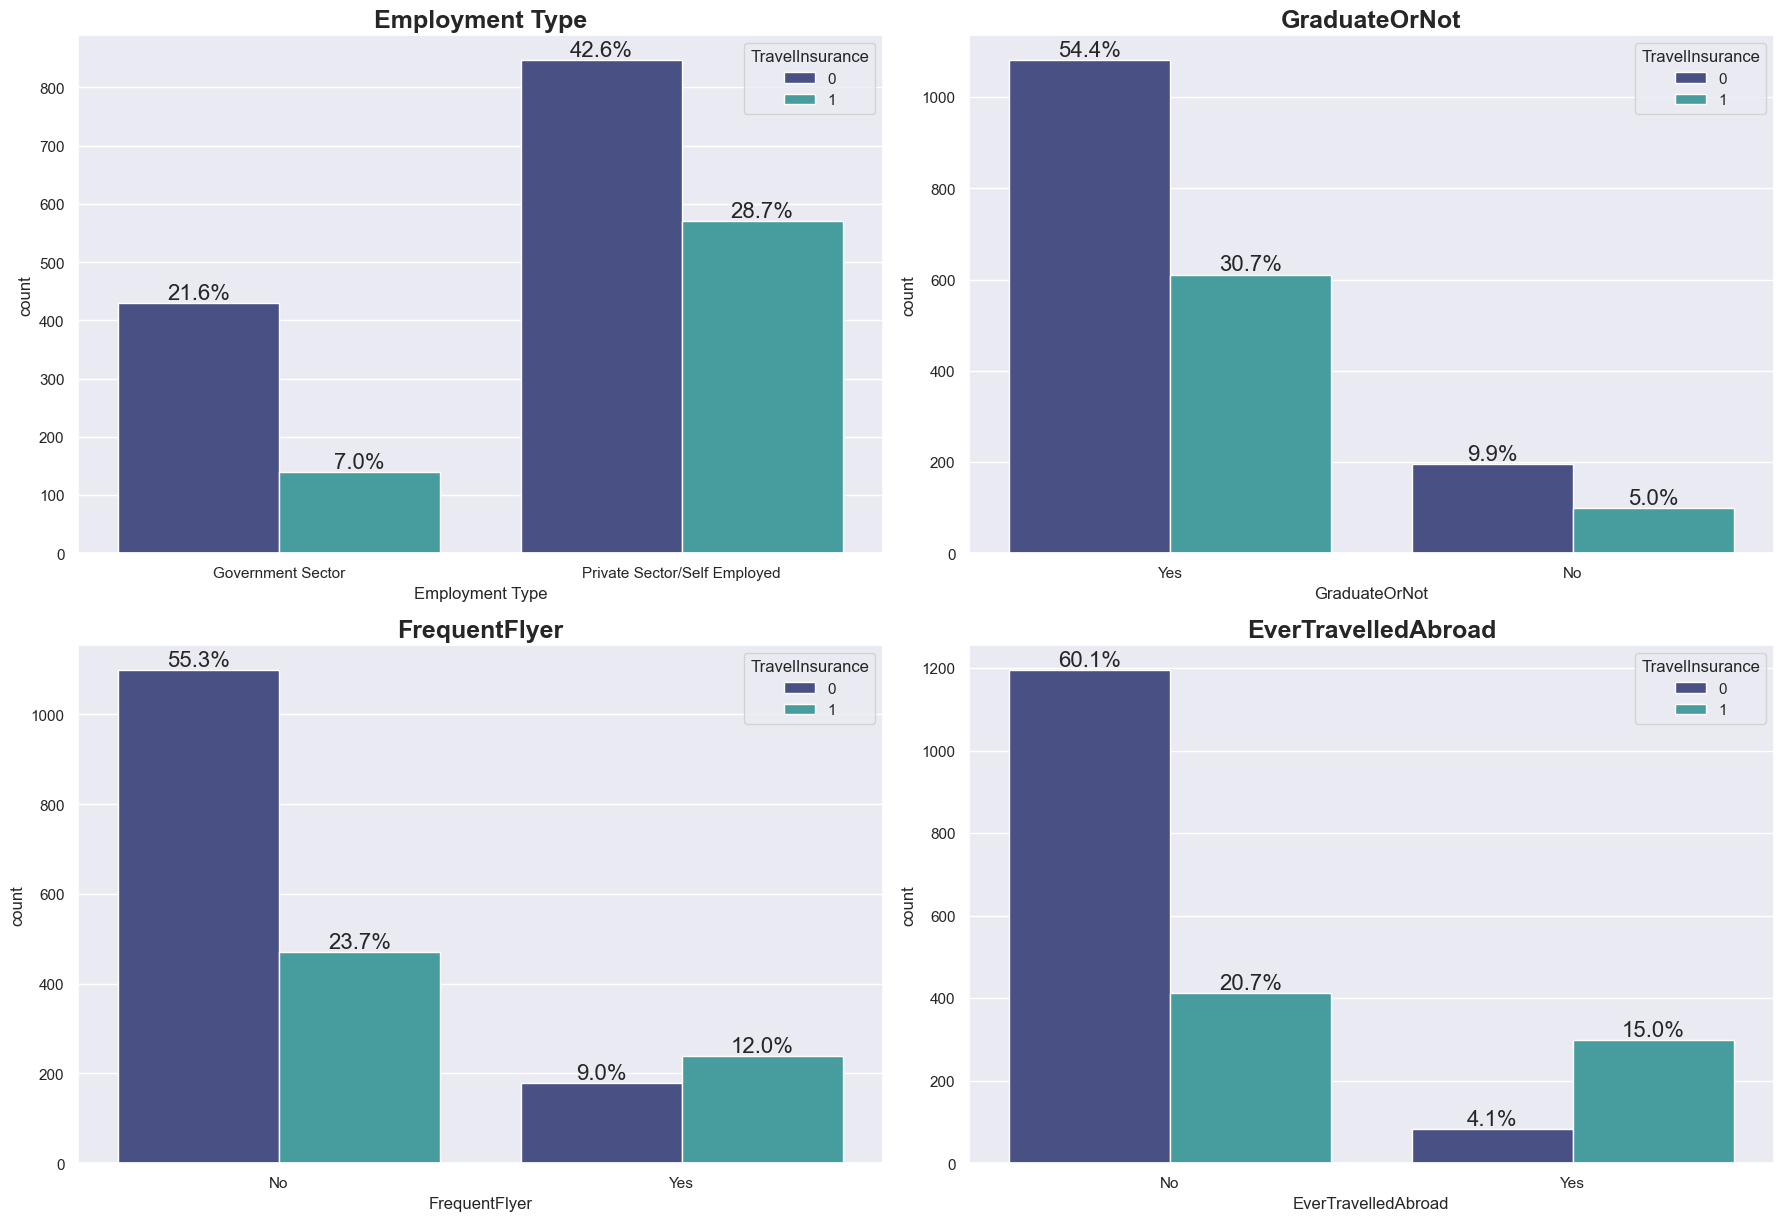

In [11]:
# Melihat jumlah persebaran data pada kolom categorical dengan target (TravelInsurance)

plt.figure(figsize=(18, 18))
for i in range(0, len(cat)):
    plt.subplot(3, 2, i+1)
    ax = sns.countplot(x=df[cat[i]], hue=df['TravelInsurance'], palette="mako")
    
    # Menghitung total data per kategori
    total = len(df[cat[i]])
    
    # Menambahkan persentase pada setiap barplot
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=16)
    
    # Set judul plot
    plt.title(cat[i], weight='bold', fontsize=18)

plt.tight_layout()
plt.show()


**Interpretasi Data:**

1. Baik customer yang bekerja di Pemerintahan maupun Swasta cenderung tidak membeli Asuransi Perjalanan. Namun rasio pembelian Asuransi Perjalanan di Sektor Swasta lebih tinggi lebih dari dua kali lipat dibandingkan Pemerintah.
2. Terdapat perbedaan yang signifikan dalam keputusan pembelian Asuransi Perjalanan antara customer yang tamat sarjana dan yang tidak.
3. Not Frequent flyer atau pelanggan yang tidak sering bepergian, memiliki potensi yang lebih tinggi untuk membeli asuransi. Namun, Frequent Flyer masih memiliki potensi untuk membeli asuransi
4. Pelanggan yang pernah bepergian ke luar negeri cenderung membeli Asuransi Perjalanan.

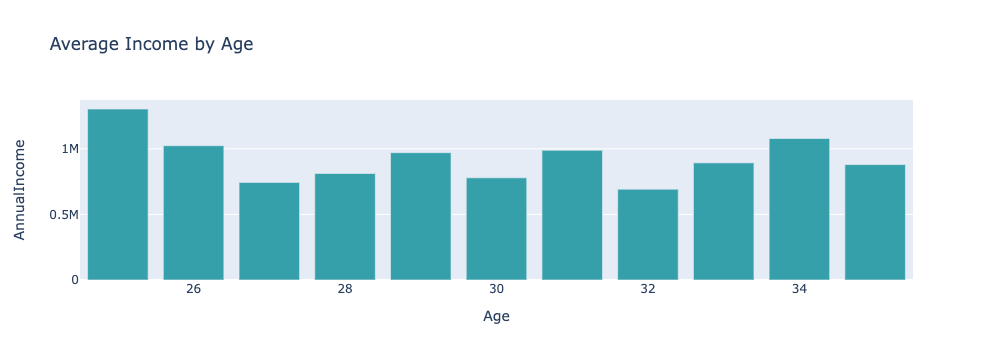

In [12]:
interim_df = df.groupby('Age').mean(numeric_only=True).reset_index()

px.bar(
    interim_df,
    x='Age',
    y='AnnualIncome',
    color_discrete_sequence=['#35A0AA'],
    title='Average Income by Age'
)

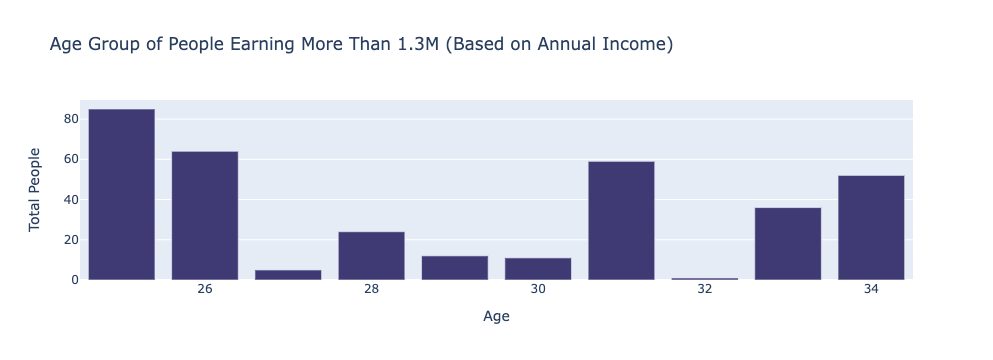

In [13]:
income_greater = df[df['AnnualIncome']>1300000].groupby('Age').size()
income_greater = income_greater.reset_index(name='Total People')
px.bar(income_greater,
         x='Age',
         y='Total People',
         color_discrete_sequence=['#3F3974'],
         title='Age Group of People Earning More Than 1.3M (Based on Annual Income)'
      )

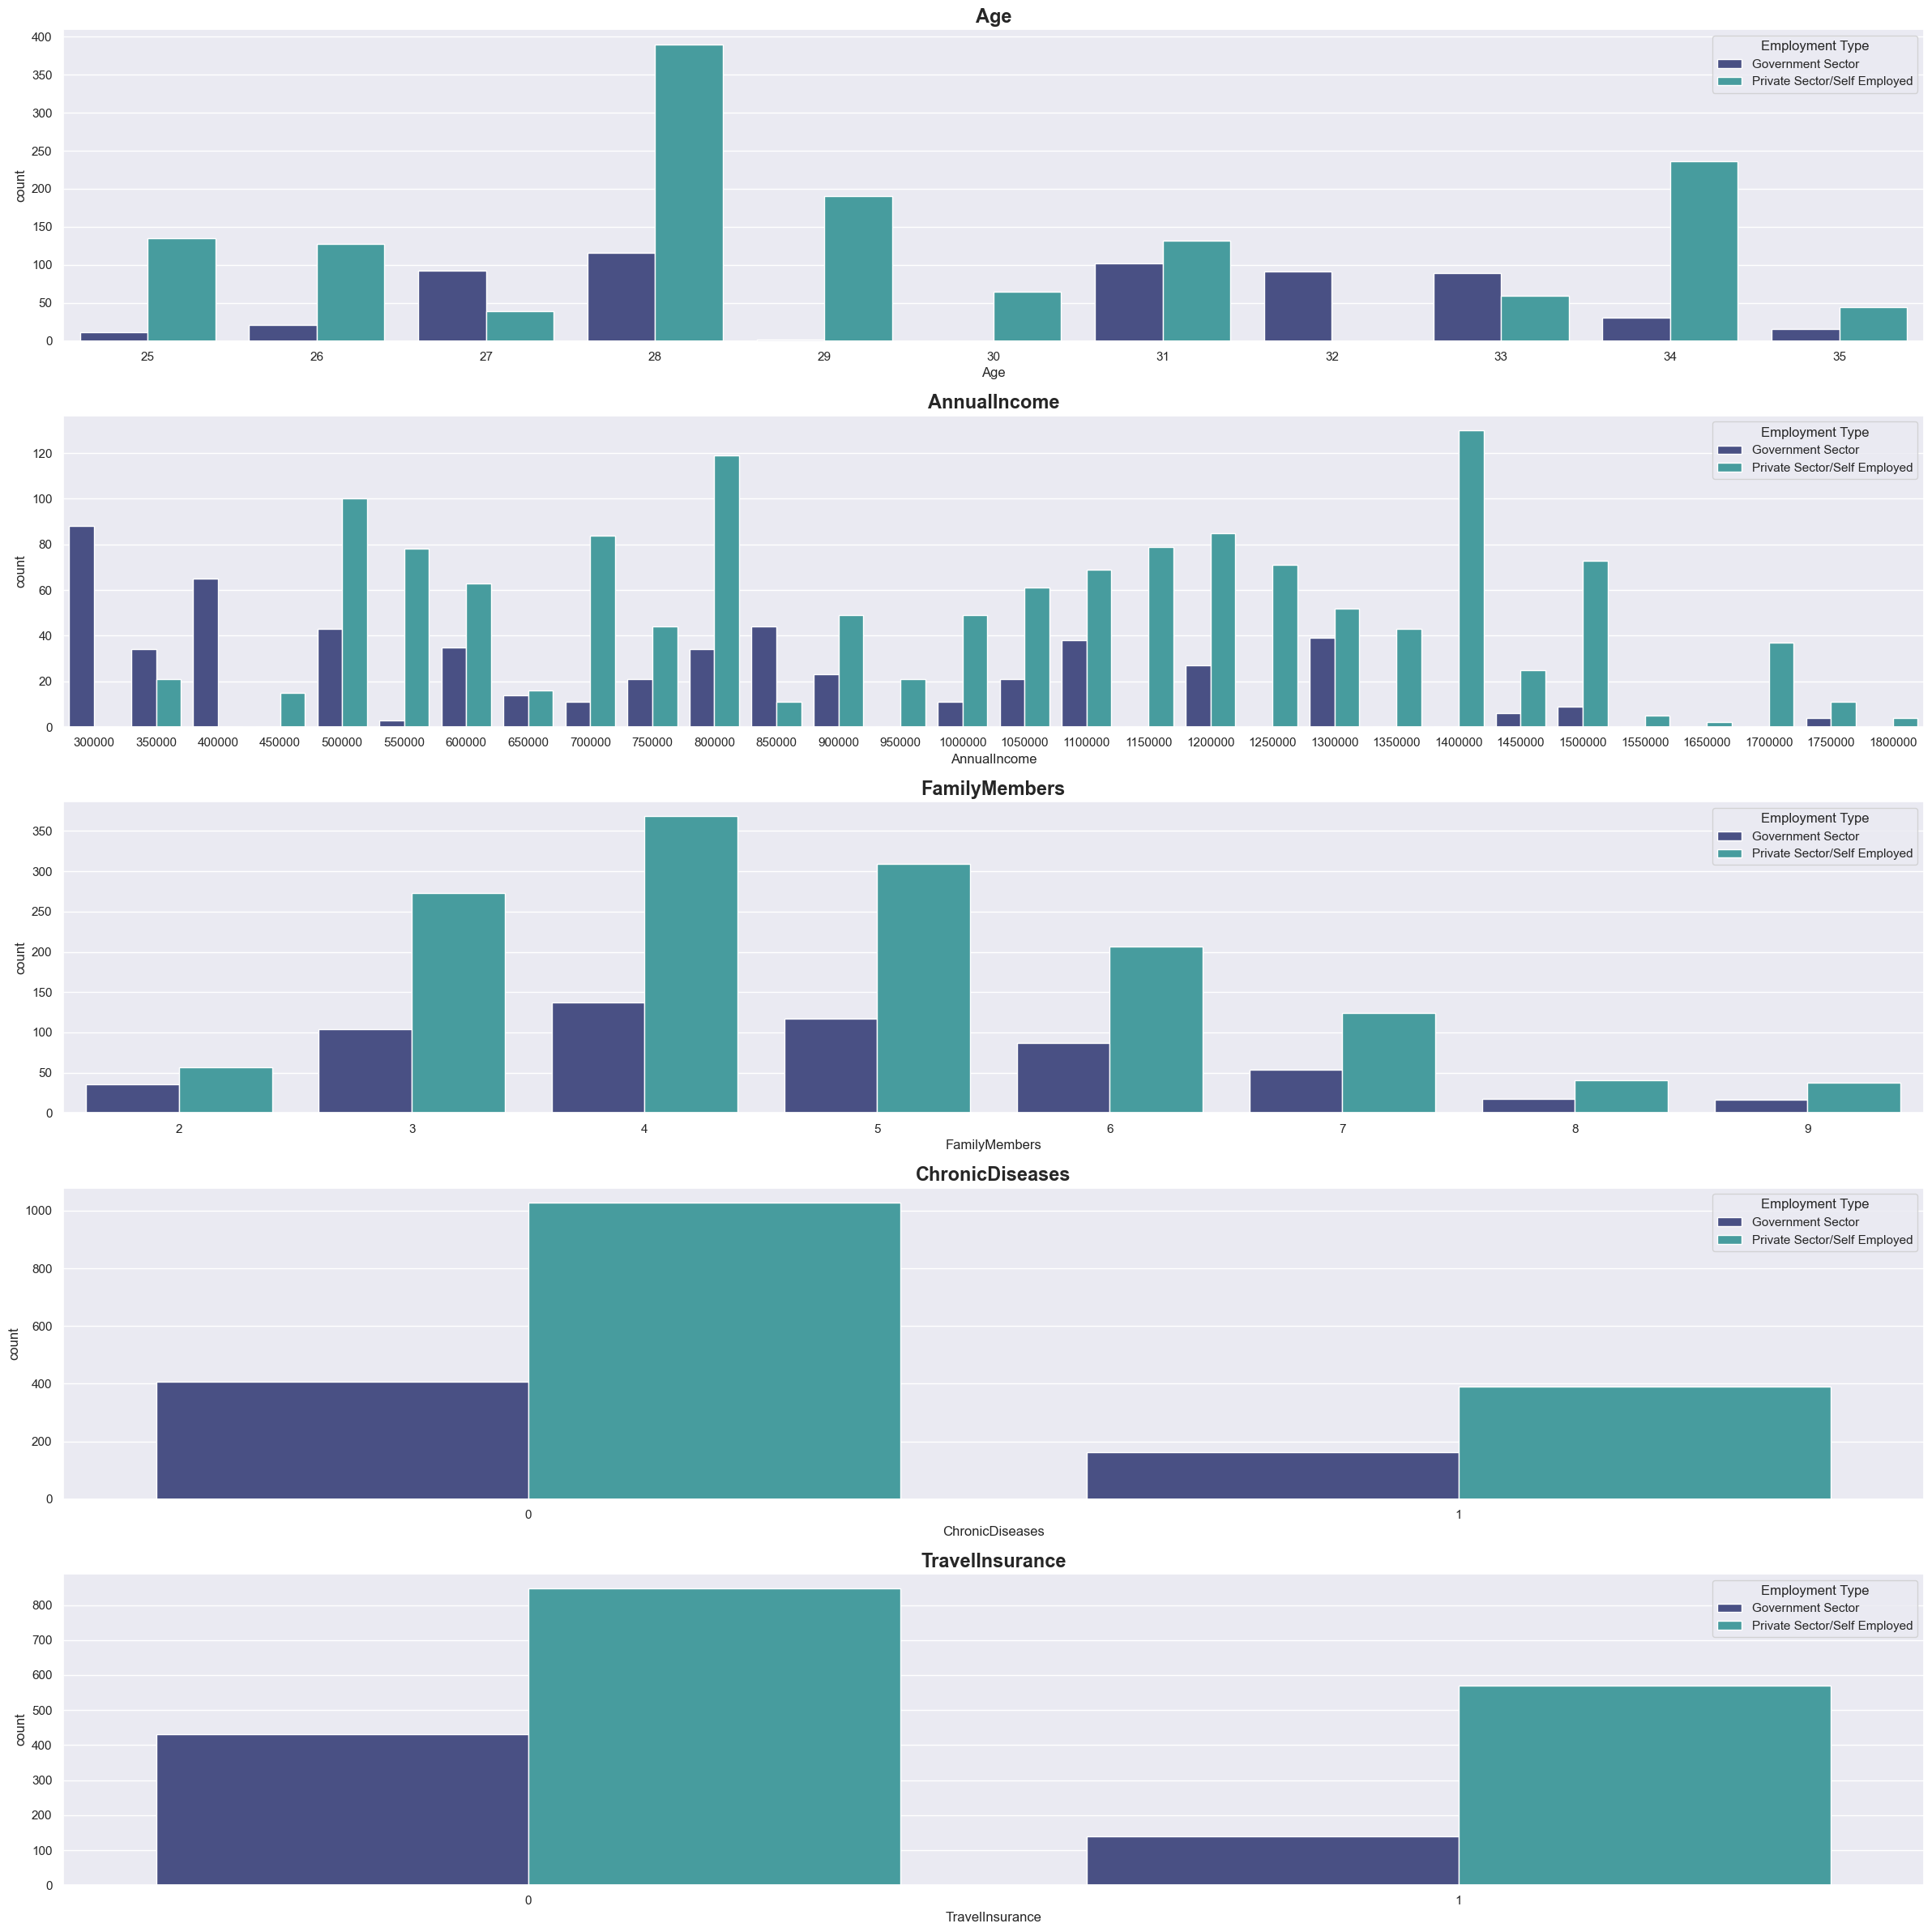

In [14]:
# Numerical
plt.figure(figsize=(24,24))
for i in range(0, len(num)):
    plt.subplot(5,1,i+1)
    sns.countplot(data=df, x=df[num[i]], hue = df['Employment Type'], palette="mako")
    # Set plot title
    plt.title(num[i], weight='bold', fontsize = 17)
    # Rotate x-tick labels 90 degrees
    #plt.xticks(rotation=15)
    plt.tight_layout()

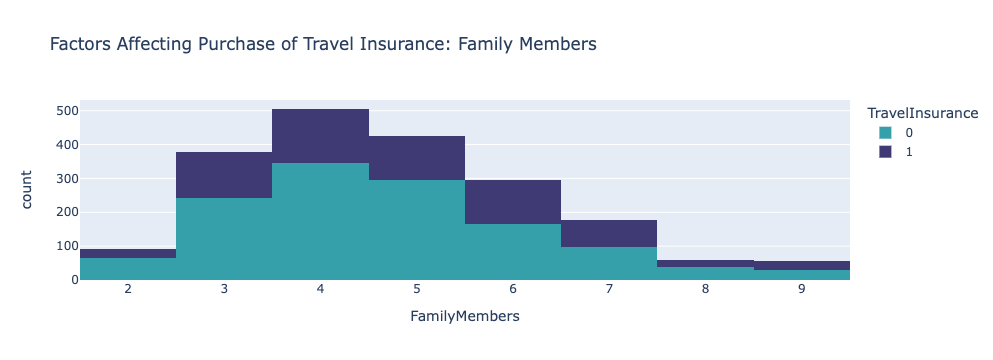

In [15]:
figure = px.histogram(df, x="FamilyMembers", color="TravelInsurance",
                      title="Factors Affecting Purchase of Travel Insurance: Family Members",
                       color_discrete_sequence=['#35A0AA','#3F3974'])

figure.show()

**Interpretasi Data:**

1. Jumlah Family member yang beranggotakan 4 orang kebanyakan membeli asuransi perjalanan, dibandingkan dengan jumlah anggota yang lain.
2. Semakin banyak anggota keluarga, peminat asuransi perjalanan semakin menurun.

### Multivariate Analysis

Analisis Multivariat merupakan metode statistik yang memungkinkan melakukan penelitian terhadap satu atau lebih dari dua variabel secara bersamaan. Untuk melihat korelasi feature kami menggunakan heatmap. Namun, korelasi ini hanya akan berlaku untuk fitur numerik. Untuk fitur kategorikal, kami melakukan encoding terlebih dahulu (dengan one-hot encoding) agar bisa dimasukkan ke dalam perhitungan korelasi.

In [16]:
df_copy = df.copy()

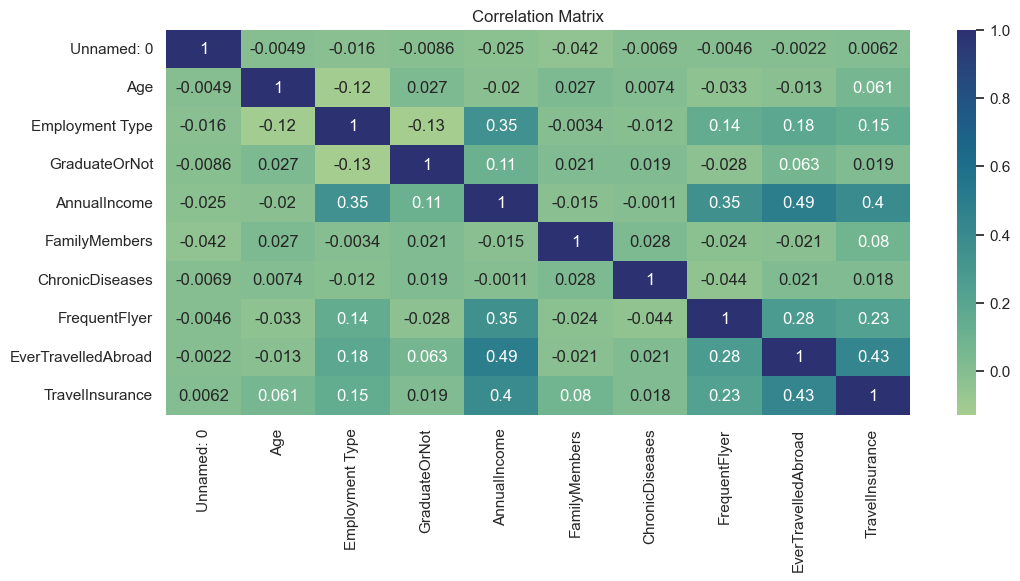

In [17]:
from sklearn.preprocessing import LabelEncoder

object_cols = df_copy.select_dtypes(include=['object']).columns

for col in object_cols:
   encoder = LabelEncoder()
   df_copy[col] = encoder.fit_transform(df_copy[col])

corr = df_copy.corr()
sns.heatmap(corr, annot=True, cmap='crest')
plt.title('Correlation Matrix')
plt.show()

**Dari corelation heat map diatas dapat dilihat bahwa:**

1. `EverTravelledAbroad`(0,43) dan `AnnualIncome` (0.,4) memiliki korelasi positif yang kuat dengan `TravelInsurance`

2. `Age` memiliki korelasi yang lemah dan negatif dengan `AnnualIncome` (-0,02).
3. `AnnualIncome` memiliki korelasi yang lemah dan negatif dengan `ChronicDiseases` (-0,0011).

<Axes: >

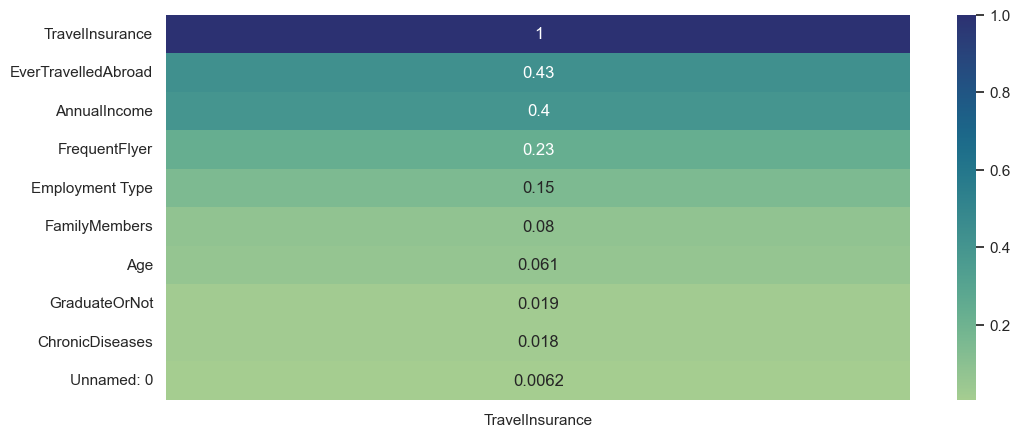

In [18]:
corr=df_copy.corr()["TravelInsurance"]
corr=corr.abs().sort_values(ascending=False).to_frame()
sns.heatmap(data=corr,annot=True, cmap='crest')

<Figure size 1500x1500 with 0 Axes>

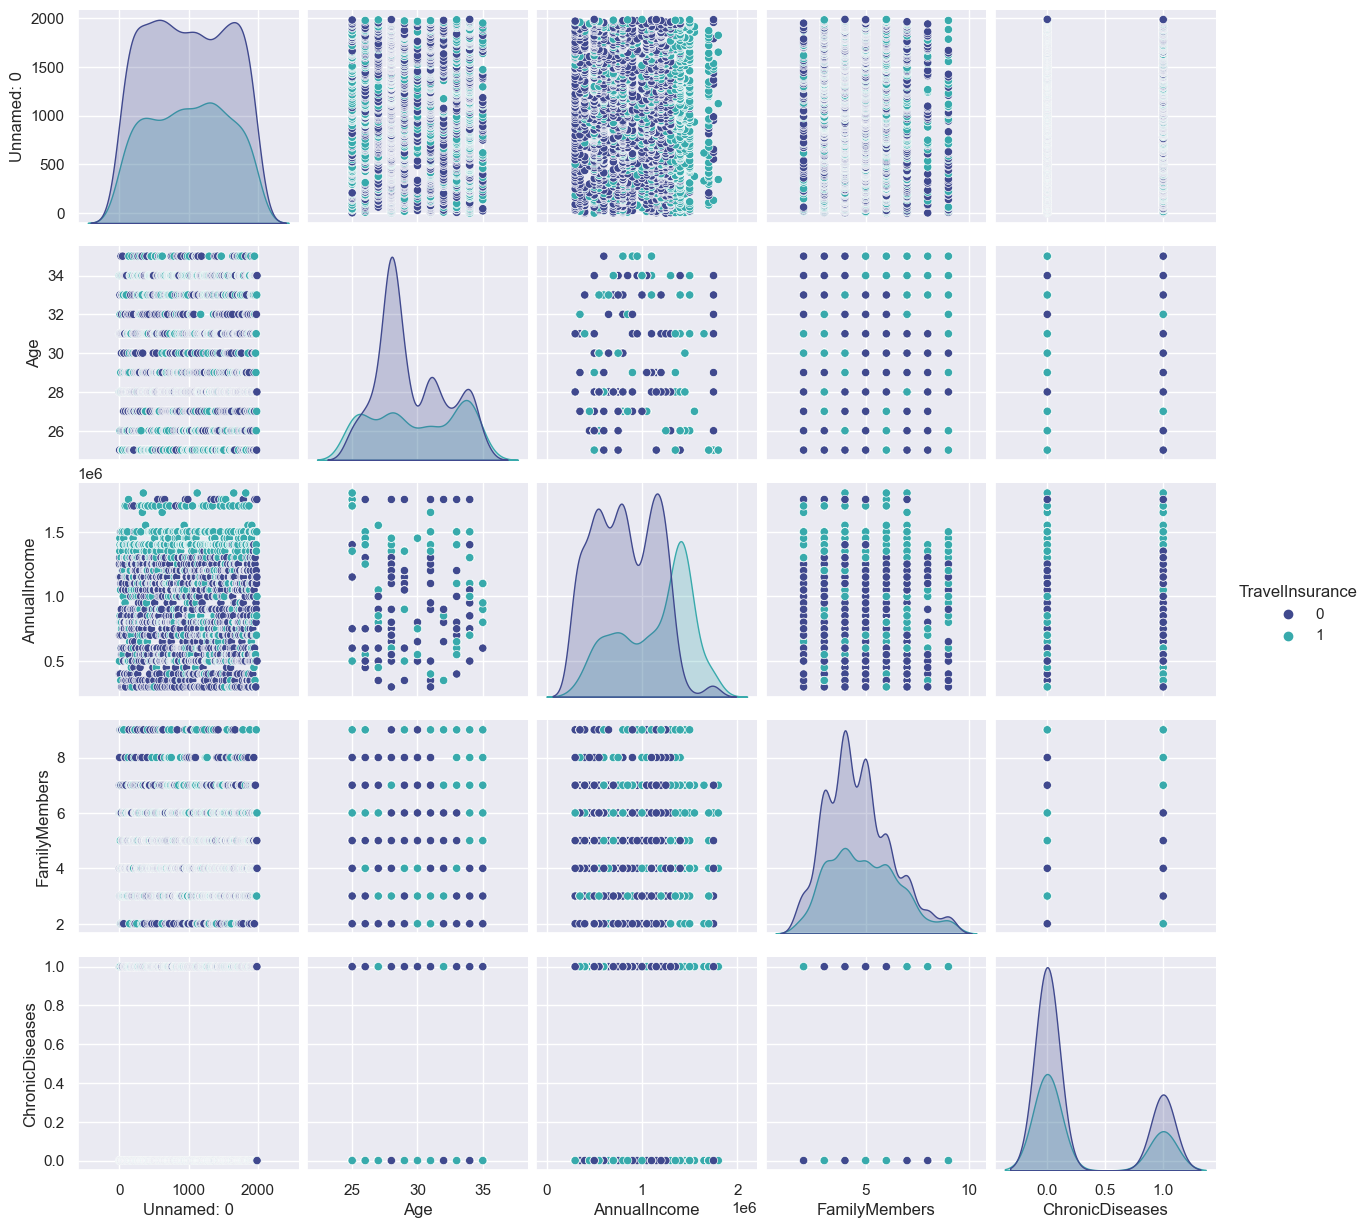

In [19]:
# Pairplot
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde', hue='TravelInsurance', palette='mako');

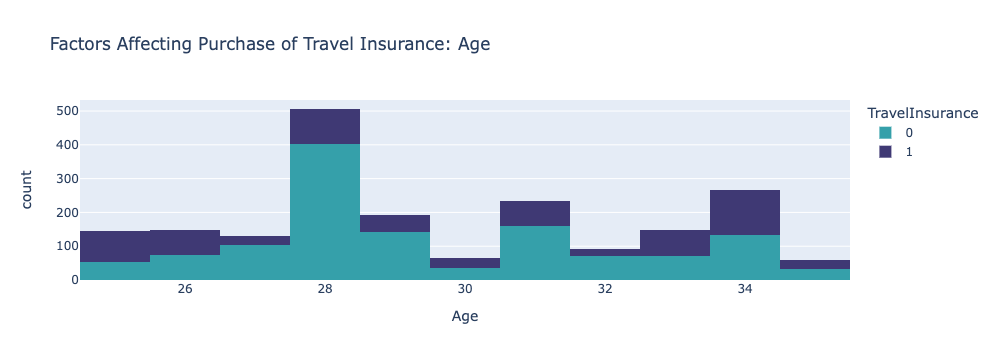

<Figure size 400x400 with 0 Axes>

In [20]:
import plotly.express as px
plt.figure(figsize=(4, 4))
figure=px.histogram(df, x="Age", color= "TravelInsurance",
                    title= "Factors Affecting Purchase of Travel Insurance: Age",
                       color_discrete_sequence=['#35A0AA','#3F3974'])
figure.show()

Pengamatan pengaruh `Age` terhadap purchasing Travel Insurance:

TOP Pelanggan yang sering melakukan pembelian travel insurance berdasarkan umur: <br>
a. Umur 28 <br>
b. Umur 34 <br>
c. Umur 31

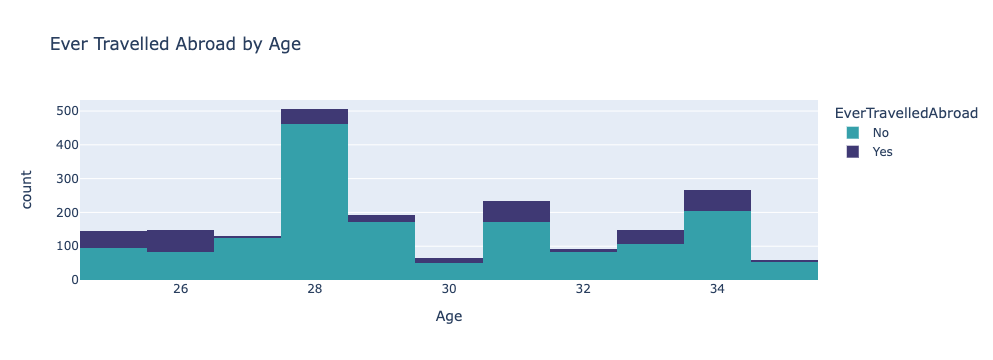

<Figure size 400x400 with 0 Axes>

In [21]:
import plotly.express as px
plt.figure(figsize=(4, 4))
figure=px.histogram(df, x="Age", color= "EverTravelledAbroad",
                    title= "Ever Travelled Abroad by Age",
                       color_discrete_sequence=['#35A0AA','#3F3974'])

figure.show()

Pengamatan pengaruh `Age` terhadap Ever Travelled Abroad

TOP pelanggan yang sering bepergian keluar negeri berdasarkan Umur: <br>
a. Umur 26 <br>
b. Umur 31 <br>
c. Umur 34 <br>

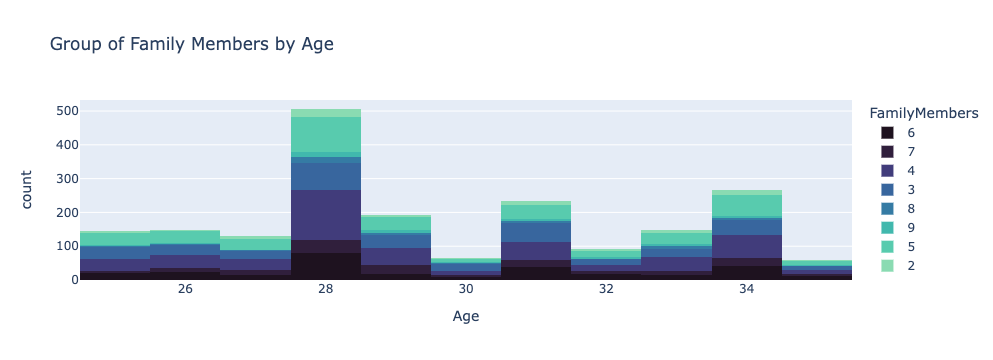

<Figure size 400x400 with 0 Axes>

In [22]:
import plotly.express as px
plt.figure(figsize=(4, 4))
figure=px.histogram(df, x="Age", color= "FamilyMembers",
                    title= "Group of Family Members by Age",
                    color_discrete_sequence=['#1E121F', '#301F3C', '#413C7B', '#38669E', '#357BA4', '#41B8AD', '#58CBAE', '#8ADBB2'])
figure.show()

**Summary**

1. Pekerjaan dan Pembelian Asuransi Perjalanan:

> Customer yang bekerja di sektor swasta cenderung lebih membeli asuransi perjalanan dibandingkan dengan mereka yang bekerja di pemerintahan.
Rasio pembelian asuransi perjalanan di sektor swasta lebih tinggi lebih dari 2 kali lipat dibandingkan dengan sektor pemerintah.
Pendidikan dan Pembelian Asuransi Perjalanan:

2. Terdapat perbedaan yang cukup signifikan dalam keputusan pembelian asuransi perjalanan antara customer yang tamat sarjana dan yang tidak.

3. Pengaruh Penyakit Kronis:

> Tidak terlihat pengaruh signifikan dari keberadaan penyakit kronis terhadap kecenderungan customer untuk membeli asuransi perjalanan.

4. Pelanggan yang bukan frequent flyer (tidak sering bepergian) memiliki potensi lebih tinggi untuk membeli asuransi perjalanan. Meskipun begitu, pelanggan frequent flyer masih memiliki potensi untuk membeli asuransi perjalanan.

5. Perjalanan ke Luar Negeri dan Pembelian Asuransi:

> Customer yang pernah bepergian ke luar negeri cenderung lebih mungkin membeli asuransi perjalanan.

6. Keluarga yang terdiri dari 4 anggota memiliki kecenderungan lebih tinggi untuk membeli asuransi perjalanan dibandingkan dengan jumlah anggota keluarga yang lain. Semakin banyak anggota keluarga, kecenderungan untuk membeli asuransi perjalanan cenderung menurun.

7. Pengaruh Umur

> - Usia 25 memiliki Annual Income tertinggi. Pada umur ini rata-rata customer sedang masuk di tahap berada pada jenjang karir yang sudah dibangun dan berusaha untuk membuat stable secara karir maupun financial. <br>
> - Usia 28 banyak membeli travel insurance dan memiliki banyak family member dibanding umur yang lain. <br>
> - Umur 34 berada pada urutan kedua dalam membeli travel insurance dan memiliki jumlah anggota keluarga terbanyak, dengan annual income tertinggi ke 2. Hal tersebut memungkinkan karena pada rata-rata pada umur 34 tahun sudah berkeluarga dan sudah ditahap financially stable dengan posisi pekerjaannya. <br>
> - Umur 26 memiliki jumlah pembeli travel insurance terbanyak yang pernah berpergian keluar negeri, kedua umur 31 dan 34.

### Insights

1. Perusahaan dapat mempertimbangkan untuk mengarahkan strategi pemasaran asuransi perjalanan lebih khusus ke pelanggan di sektor swasta, mengingat rasio pembelian yang lebih tinggi di sektor ini.
2. Perusahaan dapat menawarkan paket member travel insurance dengan segmen annual income.
3. Perusahaan dapat mempertimbangkan strategi pemasaran yang menawarkan berbagai promo untuk paket wisata dengan menargetkan customer yang tidak sering berpergian dan yang belum pernah berpergian ke luar negeri.
4. Perusahaan dapat menawarkan paket asuransi keluarga khususnya untuk keluarga beranggotakan 4 orang.


## Preprocessing

### Missing Values

In [23]:
df.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

Tidak ada missing value.

### Duplicate Values

In [24]:
df.duplicated().any()

False

Tidak ada data duplikat.

### Handling Outliers

Dari grafik yang kami keluarkan ketika EDA, diketahui bahwa hampir semua kolom numerik memiliki tidak memiliki outlier.

In [25]:
# identifikasi outliers untuk kolom numerik menggunakan IQR

num = ['Age', 'AnnualIncome','FamilyMembers','ChronicDiseases','TravelInsurance']
outliers_count = {}

for col in num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outliers_count[col] = len(outliers)
outliers_count

{'Age': 0,
 'AnnualIncome': 0,
 'FamilyMembers': 0,
 'ChronicDiseases': 0,
 'TravelInsurance': 0}

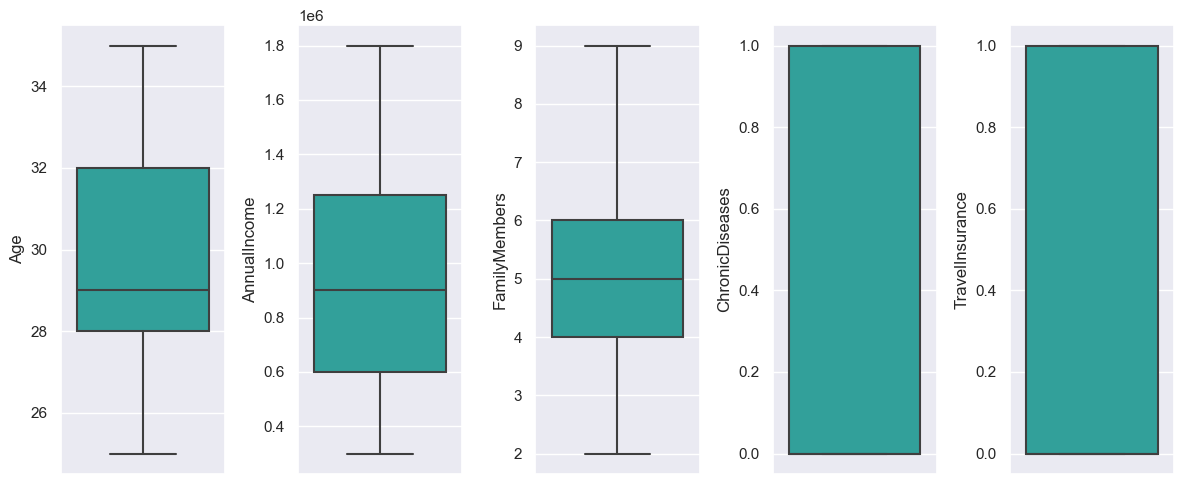

In [26]:
# Boxplot untuk melihat outliers

features = num
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='lightseagreen', orient='v')
    plt.tight_layout()

Berdasarkan boxplot diatas, tidak terdapat outliers.

### Feature Encoding

In [27]:
df.sample(5)

Unnamed: 0  Age               Employment Type GraduateOrNot  \
592          592   25  Private Sector/Self Employed           Yes   
282          282   26  Private Sector/Self Employed           Yes   
1278        1278   30  Private Sector/Self Employed            No   
1898        1898   25  Private Sector/Self Employed            No   
658          658   30  Private Sector/Self Employed            No   

      AnnualIncome  FamilyMembers  ChronicDiseases FrequentFlyer  \
592        1700000              4                0           Yes   
282        1400000              4                0            No   
1278        550000              3                0            No   
1898        600000              4                1           Yes   
658        1450000              6                0           Yes   

     EverTravelledAbroad  TravelInsurance  
592                   No                1  
282                  Yes                1  
1278                  No                1  
1898                  No                0  
658                  Yes                1

In [28]:
object_cols = df.select_dtypes(include=['object']).columns

for col in object_cols:
   encoder = LabelEncoder()
   df[col] = encoder.fit_transform(df[col])

In [29]:
df.head()

Unnamed: 0  Age  Employment Type  GraduateOrNot  AnnualIncome  \
0           0   31                0              1        400000   
1           1   31                1              1       1250000   
2           2   34                1              1        500000   
3           3   28                1              1        700000   
4           4   28                1              1        700000   

   FamilyMembers  ChronicDiseases  FrequentFlyer  EverTravelledAbroad  \
0              6                1              0                    0   
1              7                0              0                    0   
2              4                1              0                    0   
3              3                1              0                    0   
4              8                1              1                    0   

   TravelInsurance  
0                0  
1                0  
2                1  
3                0  
4                0

### Split Data

In [31]:
# Train Test Split

from sklearn.model_selection import train_test_split
df.drop(columns=('Unnamed: 0'),inplace=True)

X = df.drop(['TravelInsurance'], axis=1)
y = df['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)


### Class Imbalance

In [32]:
print("Original class distribution:")
print(pd.Series(y_train).value_counts())

# Create a SMOTE object with the desired sampling_strategy
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(X_train, y_train)

print("\nClass distribution after SMOTE:")
print(pd.Series(y_over_SMOTE).value_counts())

Original class distribution:
0    904
1    486
Name: TravelInsurance, dtype: int64

Class distribution after SMOTE:
0    904
1    904
Name: TravelInsurance, dtype: int64


## Modelling

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred),"\n")

    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred),"\n")

    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred),"\n")

    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred),"\n")

    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]),"\n")

    score = cross_validate(RandomForestClassifier(), X, y, cv=5, scoring='precision', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()),"\n")

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

### Logistic Regression

In [35]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_over_SMOTE, y_over_SMOTE)
eval_classification(logreg)

Accuracy (Train Set): 0.74
Accuracy (Test Set): 0.76 

Precision (Train Set): 0.65
Precision (Test Set): 0.72 

Recall (Train Set): 0.55
Recall (Test Set): 0.58 

F1-Score (Train Set): 0.59
F1-Score (Test Set): 0.64 

roc_auc (train-proba): 0.73
roc_auc (test-proba): 0.74 

roc_auc (crossval train): 0.9495180730419518
roc_auc (crossval test): 0.7426803531288189 



In [36]:
# Hyperparameter Tuning Logistic Regression

from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear'],
    'max_iter': [100, 200, 300]
}

# Create logistic regression model
logreg = LogisticRegression()

# Perform grid search
cv = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=3)
cv.fit(X_train, y_train)

# Get best parameters
best_params = cv.best_params_
print('The best parameters are:', best_params)


The best parameters are: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [37]:
tuned_logreg = LogisticRegression(penalty='l1', C=100, solver='liblinear', max_iter=100)
tuned_logreg.fit(X_train, y_train)
y_pred = tuned_logreg.predict(X_test)
eval_classification(tuned_logreg)

Accuracy (Train Set): 0.76
Accuracy (Test Set): 0.78 

Precision (Train Set): 0.77
Precision (Test Set): 0.84 

Recall (Train Set): 0.47
Recall (Test Set): 0.52 

F1-Score (Train Set): 0.58
F1-Score (Test Set): 0.64 

roc_auc (train-proba): 0.75
roc_auc (test-proba): 0.78 

roc_auc (crossval train): 0.9476258239466535
roc_auc (crossval test): 0.7411653641303928 



### Random Forest

In [38]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_over_SMOTE, y_over_SMOTE)
eval_classification(rf)

Accuracy (Train Set): 0.91
Accuracy (Test Set): 0.75 

Precision (Train Set): 0.89
Precision (Test Set): 0.67 

Recall (Train Set): 0.86
Recall (Test Set): 0.67 

F1-Score (Train Set): 0.87
F1-Score (Test Set): 0.67 

roc_auc (train-proba): 0.97
roc_auc (test-proba): 0.80 

roc_auc (crossval train): 0.9459199352346618
roc_auc (crossval test): 0.7389133478784722 



In [39]:
# Hyperparameter Tuning Random Forest

param_grid = {
    'bootstrap': [True],
    'max_depth': [100, 200, 300],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [100, 200, 300]
}

cv = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3)
cv.fit(X_train, y_train)
best_params = cv.best_params_
print('The best params are:',best_params)

The best params are: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}


In [40]:
tuned_rf = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=100, max_features=3,
                                  min_samples_leaf=3, min_samples_split=12, n_estimators=200)
tuned_rf.fit(X_train, y_train)
y_pred = tuned_rf.predict(X_test)
eval_classification(tuned_rf)

Accuracy (Train Set): 0.84
Accuracy (Test Set): 0.83 

Precision (Train Set): 0.92
Precision (Test Set): 0.91 

Recall (Train Set): 0.59
Recall (Test Set): 0.60 

F1-Score (Train Set): 0.72
F1-Score (Test Set): 0.73 

roc_auc (train-proba): 0.93
roc_auc (test-proba): 0.82 

roc_auc (crossval train): 0.956592049618701
roc_auc (crossval test): 0.7502801377607332 



### Gradient Boosting

In [41]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_over_SMOTE, y_over_SMOTE)
eval_classification(gb)

Accuracy (Train Set): 0.84
Accuracy (Test Set): 0.80 

Precision (Train Set): 0.86
Precision (Test Set): 0.80 

Recall (Train Set): 0.65
Recall (Test Set): 0.63 

F1-Score (Train Set): 0.74
F1-Score (Test Set): 0.71 

roc_auc (train-proba): 0.87
roc_auc (test-proba): 0.81 

roc_auc (crossval train): 0.9445442639750153
roc_auc (crossval test): 0.7472363570103189 



In [42]:
# Gradient Boosting

from sklearn.model_selection import GridSearchCV
param_grid = {
    "n_estimators":[1,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

cv = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3)
cv.fit(X_train,y_train)
best_params = cv.best_params_
print('The best params are:',best_params)

The best params are: {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 1}


In [43]:
tuned_gb = GradientBoostingClassifier(learning_rate=1, max_depth=3, n_estimators=1)
tuned_gb.fit(X_train, y_train)
y_pred = tuned_gb.predict(X_test)
eval_classification(tuned_gb)

Accuracy (Train Set): 0.84
Accuracy (Test Set): 0.83 

Precision (Train Set): 0.93
Precision (Test Set): 0.92 

Recall (Train Set): 0.58
Recall (Test Set): 0.59 

F1-Score (Train Set): 0.72
F1-Score (Test Set): 0.72 

roc_auc (train-proba): 0.80
roc_auc (test-proba): 0.80 

roc_auc (crossval train): 0.9494361463992942
roc_auc (crossval test): 0.7482859024931133 



### XGBoost

In [44]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_over_SMOTE, y_over_SMOTE)
eval_classification(xg)

Accuracy (Train Set): 0.89
Accuracy (Test Set): 0.75 

Precision (Train Set): 0.88
Precision (Test Set): 0.67 

Recall (Train Set): 0.81
Recall (Test Set): 0.65 

F1-Score (Train Set): 0.84
F1-Score (Test Set): 0.66 

roc_auc (train-proba): 0.96
roc_auc (test-proba): 0.80 

roc_auc (crossval train): 0.9487891071374964
roc_auc (crossval test): 0.7465551923143016 



In [45]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(xg_tuned)

Accuracy (Train Set): 0.85
Accuracy (Test Set): 0.81 

Precision (Train Set): 0.90
Precision (Test Set): 0.84 

Recall (Train Set): 0.65
Recall (Test Set): 0.61 

F1-Score (Train Set): 0.76
F1-Score (Test Set): 0.71 

roc_auc (train-proba): 0.92
roc_auc (test-proba): 0.81 

roc_auc (crossval train): 0.9455480316763201
roc_auc (crossval test): 0.7463063202392 



### Best Model

Dalam menganalisis performa model, metrik yang relevan untuk mempertimbangkan adalah recall, karena kami tertarik pada kemampuan model untuk mengidentifikasi positif sebenarnya dari semua kasus positif pada dataset.

Logistic Regression:
- Recall (Train Set): 0.47 
- Recall (Test Set): 0.52

Random Forest:
- Recall (Train Set): 0.59
- Recall (Test Set): 0.60

Gradient Boosting:
- Recall (Train Set): 0.58
- Recall (Test Set): 0.59

XG Boost:
- Recall (Train Set): 0.65
- Recall (Test Set): 0.61


Kesimpulan: <br>
**Berdasarkan analisis terhadap metrik recall** dan metrik lainnya, **model XG Boost kemungkinan menjadi model terbaik di antara keempat model** yang telah di evaluasi. Meskipun memiliki nilai recall yang sebanding dengan Random Forest dan Gradient Boosting, model **XG Boost juga memiliki nilai precision, F1-score, dan roc_auc yang cukup tinggi.** 

### Classification Report, Accuracy Score, and Confusion Matrix

In [46]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')

xg_tuned.fit(X_train,y_train)

# Training set predictions
y_train_pred = xg_tuned.predict(X_train)

# Test set predictions
y_test_pred = xg_tuned.predict(X_test)

In [47]:
# Evaluation on training set
print("Training Set Metrics:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

# Evaluation on test set
print("\nTest Set Metrics:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Training Set Metrics:
Accuracy: 0.8525179856115108
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.89       904
           1       0.90      0.65      0.76       486

    accuracy                           0.85      1390
   macro avg       0.87      0.81      0.83      1390
weighted avg       0.86      0.85      0.85      1390

Confusion Matrix:
 [[868  36]
 [169 317]]

Test Set Metrics:
Accuracy: 0.8090452261306532
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86       373
           1       0.84      0.61      0.71       224

    accuracy                           0.81       597
   macro avg       0.82      0.77      0.78       597
weighted avg       0.81      0.81      0.80       597

Confusion Matrix:
 [[346  27]
 [ 87 137]]


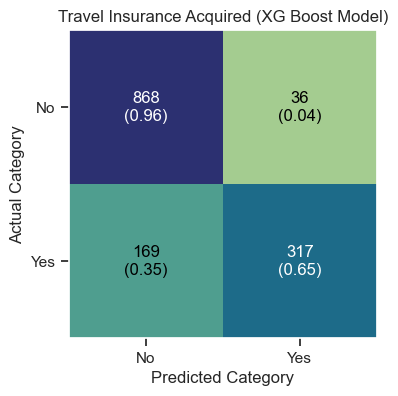

In [48]:
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

cm = metrics.confusion_matrix(y_train, y_train_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=False,
                                figsize=(4, 4),
                                cmap='crest')

plt.xticks(np.arange(2), ["No", "Yes"])
plt.yticks(np.arange(2), ["No", "Yes"])

ax.set(ylabel="Actual Category", xlabel="Predicted Category", title="Travel Insurance Acquired (XG Boost Model)",);


Kesimpulan:

- Model tampaknya memiliki performa yang cukup baik pada data pelatihan dan data pengujian, dengan akurasi sekitar 85.25% pada data pelatihan dan 80.90% pada data pengujian.
- Precision, recall, dan F1-score untuk kelas 0 (tidak membeli) relatif tinggi, menunjukkan bahwa model cenderung lebih baik dalam memprediksi kelas 0.
- Namun, untuk kelas 1 (membeli), recall relatif rendah, menunjukkan bahwa model cenderung kurang baik dalam mengidentifikasi pelanggan yang akan membeli asuransi.
- Perbaikan pada recall untuk kelas 1 mungkin diperlukan untuk meningkatkan kinerja model secara keseluruhan, terutama dalam mengidentifikasi peluang baru untuk penjualan.

### Feature Importance

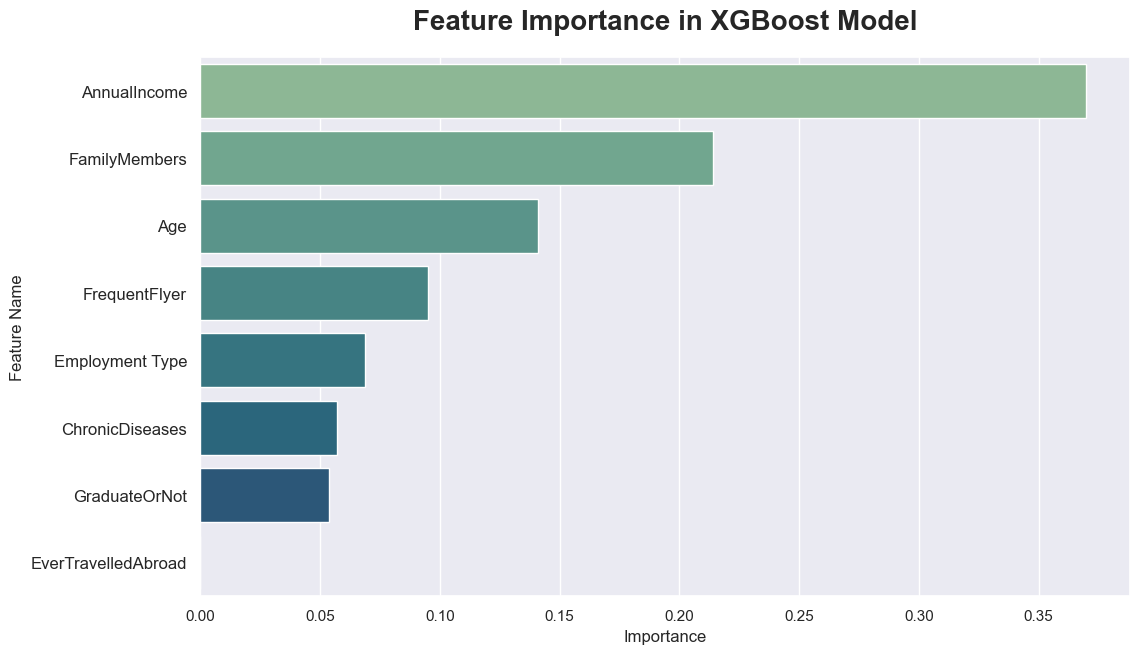

In [49]:
best_xg_model = xg_tuned.best_estimator_

# Feature importances dari model terbaik - XG Boost
importance_df = pd.DataFrame({"Feature Name": X_train.columns,
                               "Importance": best_xg_model.feature_importances_})

features = importance_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(12, 7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="crest")
plt.title("Feature Importance in XGBoost Model", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()


Berdasarkan feature importance score diatas, dapat dilihat feature AnnualIncome, Age, dan FamilyMembers merupakan top feature importance yang dapat kita jadikan fokus untuk mendapatkan hasil prediksi yang akan membeli asuransi travel pada model Random Forest ini. Feature lain seperti EverTravelledAbroad, FrequentFlyer, Employment Type, ChronicDisease, dan GraduateOrNot mempunyai score feature importance yang rendah. Selanjutnya feature ini dapat dilakukan landasan untuk feature selection pada iterasi selanjutnya.